 **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

**Reading the data**

In [2]:
df = pd.read_csv('email_spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Check the head of the dataframe**

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop the last 3 columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Renaming the columns
df.set_axis(['target','txt'], axis=1, inplace=True)
df

,target,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']= encoder.fit_transform(df['target'])
df

,target,txt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**Checking if there are null values or not**

In [10]:
df.isnull().sum()

target    0
txt       0
dtype: int64

**Checking if there are Duplicates values or not**

In [11]:
df.duplicated().sum()

403

In [12]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.head()

,target,txt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Class Distribution**

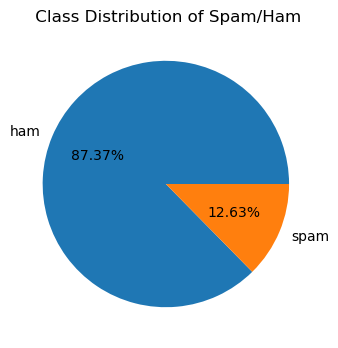

In [14]:
# Create a pie chart for class distribution

class_counts = df['target'].value_counts()
plt.subplots(figsize=(4,4))
plt.pie(class_counts, labels=['ham', 'spam'], autopct='%2.2f%%')
plt.title(' Class Distribution of Spam/Ham')
plt.show()

 we can see the data is imbalanced.

**Seperating the Dataset**

In [15]:
x=df['txt']
y=df['target']

**Splitting the dataset into training and test data**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=3)

**Feature Extraction**

In [17]:
# transform the text data to feature vectors 
feature_extraction= TfidfVectorizer(min_df = 1, stop_words='english', lowercase= 'True')
x_train_features=  feature_extraction.fit_transform(x_train)
x_test_features=  feature_extraction.transform(x_test)

# convert y_train and y_test values a integer

y_train= y_train.astype('int')
y_test= y_test.astype('int')

**Training the model**

In [18]:
# Training the logistic regression model on training data
lr= LogisticRegression()
lr.fit(x_train_features, y_train)

LogisticRegression()

**Evaluation Of trained model**

In [19]:
# Prediction on training data
pred_train=lr.predict(x_train_features)
accuracy_train = accuracy_score(y_train, pred_train)
print('accuracy score of training model is:', accuracy_train )

accuracy score of training model is: 0.962273276904474


In [20]:
# Prediction on test data
pred_test=lr.predict(x_test_features)
accuracy_test = accuracy_score(y_test, pred_test)
print('accuracy score of test model is:', accuracy_test )

accuracy score of test model is: 0.960348162475822


**building a predictive system**

In [21]:
input_mail=["Even my brother is not like to speak with me. They treat me like aids patent."]

#convert above text into feature vectors

input_mail_feature= feature_extraction.transform(input_mail)

# making prediction
 
prediction = lr.predict(input_mail_feature)    

if prediction[0]==1:
    print('Ham_Mail')
else:
    print('Spam_Mail')

Spam_Mail
